In [1]:
from random import shuffle
from turtle import color
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC

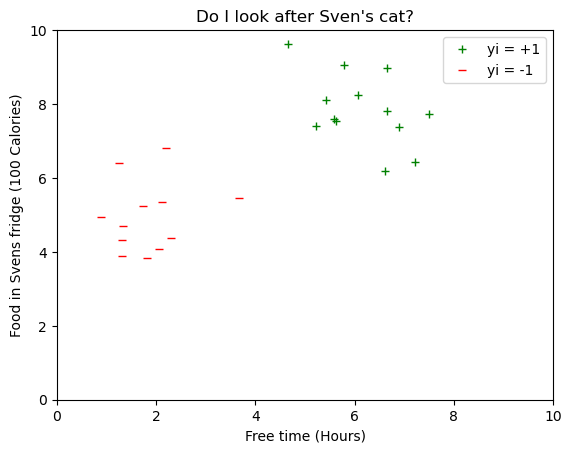

In [2]:
# Generate Dataset
X, y_tmp = datasets.make_blobs(n_samples=25, centers=2, cluster_std=1, n_features=2, center_box=(2, 11), random_state=1)

# Add the 1s to replace the bias term
#X = np.hstack((X,np.ones([X.shape[0],1], X.dtype)))

# Swap 0 and 1 values so graph makes sense
y_tmp2 = np.where(y_tmp == 1, -1, y_tmp)
y = np.where(y_tmp2 == 0, 1, y_tmp2)

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = -1')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()

In [3]:
# We set the kernel to linear fo this example
classifier = SVC(kernel='linear')

classifier.fit(X, y)
w = classifier.coef_[0]
b = classifier.intercept_[0]

print(w)
print(b)

yhat = classifier.predict(X)

# Calculate the accuracy
tp = 0
tn = 0
for i in range(len(y)):
    if y[i] == yhat[i]:
        if y[i] == 1:
            tp += 1
        else:
            tn += 1
acc = (tp + tn) / len(y)

print('Accuracy: ', acc)


[0.54507343 0.58900341]
-6.212729274806494
Accuracy:  1.0


In [4]:
# Return array of Support Vectors given by their X values
def find_hard_support_vectors(w, X, b):
    m = X.shape[0]
    support_vectors = []
    preds = []
    preds_squared = []
    for i in range(m):
        p = (np.dot(w,X[i]) + b)
        preds.append(p)
        preds_squared.append(p ** 2)
    indexes = np.argsort(preds_squared)
    for index in indexes:
        s = preds[index]
        if s < 0 and s > -1.01 and s < -0.09:
            support_vectors.append(X[index])
        if s > 0 and s > 0.09 and s < 1.01:
            support_vectors.append(X[index])
    return support_vectors
    

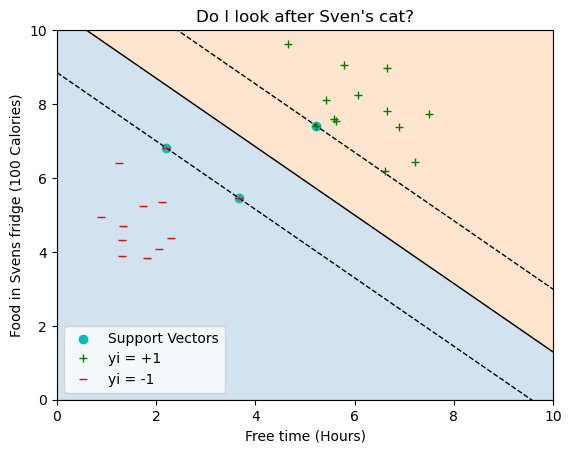

In [5]:
# Plot Hard Margin SVM

# Define decision boundary
c = -b/w[1]
m = -w[0] / w[1]
xmin, xmax = 0, 10
ymin, ymax = 0, 10
xd = np.array([xmin, xmax])
yd = (-w[0]*xd - b) / w[1]
x1 = (-b - w[0]*xd+1) / w[1]
x2 = (-b - w[0]*xd-1) / w[1]

# Plot decision boundary
plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


# Find the hard margin support vectors and plot
sv = find_hard_support_vectors(w, X, b)
for i in range(len(sv)):
   plt.scatter(sv[i][0], sv[i][1], c='c')
plt.scatter(-1, -1, c='c', label='Support Vectors')


# Plot margin
plt.plot(xd, x1, 'k', lw =1, ls ='--')
plt.plot(xd, x2, 'k', lw =1, ls ='--')

# Plot data
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = -1')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()

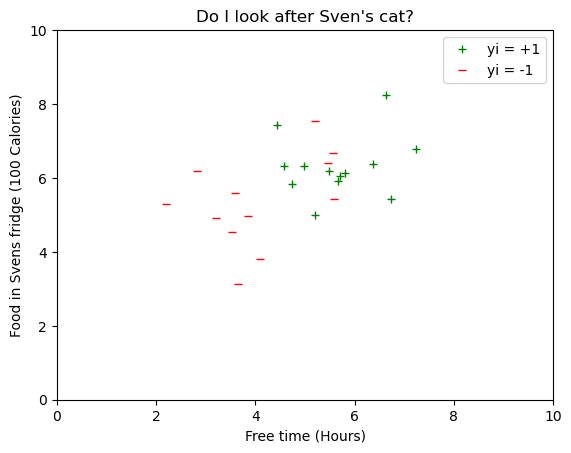

In [6]:
# Generate Dataset
X, y_tmp = datasets.make_blobs(n_samples=25, centers=2, cluster_std=1, n_features=2, center_box=(3, 8), random_state=3)

# Swap -1 and 1 values so graph makes sense
y_tmp2 = np.where(y_tmp == 1, -1, y_tmp)
y = np.where(y_tmp2 == 0, 1, y_tmp2)

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = -1')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()

In [11]:
# We set the kernel to linear fo this example
C = 10
classifier = SVC(kernel='linear', C=C)

# Fit the data
classifier.fit(X, y)

# Extract weights and bias
w = classifier.coef_[0]
b = classifier.intercept_[0]

print(w)
print(b)

# Make predictions
yhat = classifier.predict(X)

# Calculate accuracy
tp = 0
tn = 0
for i in range(len(y)):
    if y[i] == yhat[i]:
        if y[i] == 1:
            tp += 1
        else:
            tn += 1
acc = (tp + tn) / len(y)

print('Accuracy: ', acc)

[0.77396015 0.62986196]
-7.113702332638614
Accuracy:  0.84


In [12]:
# Returns array of support vectors given by their X values
def find_soft_support_vectors(w, X, b, y, yhat):
    m = X.shape[0]
    support_vectors = []
    preds = []
    preds_squared = []
    for i in range(m):
        p = (np.dot(w,X[i]) + b)
        preds.append(p)
        preds_squared.append(p ** 2)
    indexes = np.argsort(preds_squared)
    for index in indexes:
        s = preds[index]
        if s < 0 and s > -1.00:
            support_vectors.append(X[index])
        elif s > 0 and s < 1.00:
            support_vectors.append(X[index])
        elif y[index] != yhat[index]:
            support_vectors.append(X[index])
        
    return support_vectors

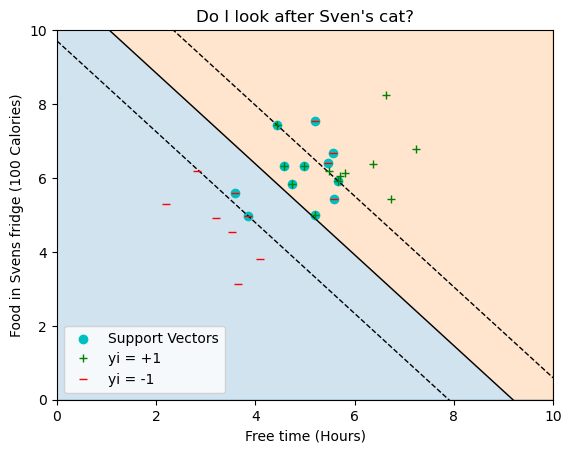

In [13]:
# Plot Soft Margin SVM

# Define decision boundary
c = -b/w[1]
m = -w[0] / w[1]
xmin, xmax = 0, 10
ymin, ymax = 0, 10
xd = np.array([xmin, xmax])
yd = (-w[0]*xd - b) / w[1]

# Define Margin
x1 = (-b - w[0]*xd+1) / w[1]
x2 = (-b - w[0]*xd-1) / w[1]

# Plot decision boundary
plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

# Get Soft Margin support vectors and plot
#sv = find_soft_support_vectors(w, X, b, y, yhat)
sv = classifier.support_vectors_
for i in range(len(sv)):
   plt.scatter(sv[i][0], sv[i][1], c='c')
plt.scatter(-1, -1, c='c', label='Support Vectors')

# Plot Margins
plt.plot(xd, x1, 'k', lw =1, ls ='--')
plt.plot(xd, x2, 'k', lw =1, ls ='--')

# Plot
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], '_', color='red', label='yi = -1')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()